In [56]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt

## 1.2 Table of Intensity vs Distance

In [57]:
distance = [5, 10, 15, 20, 25, 30, 35, 40, 45]
brightness = [3811, 1281, 677.5, 420.2, 296.9, 227.5, 187.8, 173, 154.8]

In [58]:
def relation(x, a):
    return a/(x)**2
a = opt.curve_fit(relation, distance, brightness)[0]
brightness2 = list(map(lambda x: relation(x,a), distance))

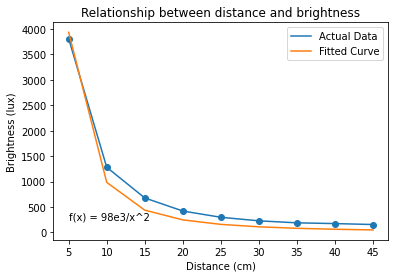

In [60]:
plt.title("Relationship between distance and brightness")
plt.xlabel("Distance (cm)")
plt.ylabel("Brightness (lux)")
plt.plot(distance, brightness, label="Actual Data")
plt.scatter(distance, brightness)
plt.plot(distance, brightness2, label="Fitted Curve")
plt.text(5,250,f"f(x) = 98e3/x^2")
plt.legend()
plt.savefig("brightnessDistanceRelation.png", dpi=500)

## 1.3 Table of Intensity vs Angle

In [163]:
angle =      [-15,      +0,  +15,  +30,  +45,  +60,  +75,  +90]
#angle = list(map(lambda x: x/180*np.pi, angle))
brightness = [296.8, 281.4,237.2,179.9,128.3,86.76,72.76,83.72

In [164]:
def sin_func(x, b, c, d):
    ang = x/180*np.pi
    return b*(np.cos(ang+d))**2 + c
p_o = [150, 150, angle[0]]
b, c, d = opt.curve_fit(sin_func, angle, brightness, p0=p_o)[0]
brightness2 = list(map(lambda x: sin_func(x,b,c,d), angle))

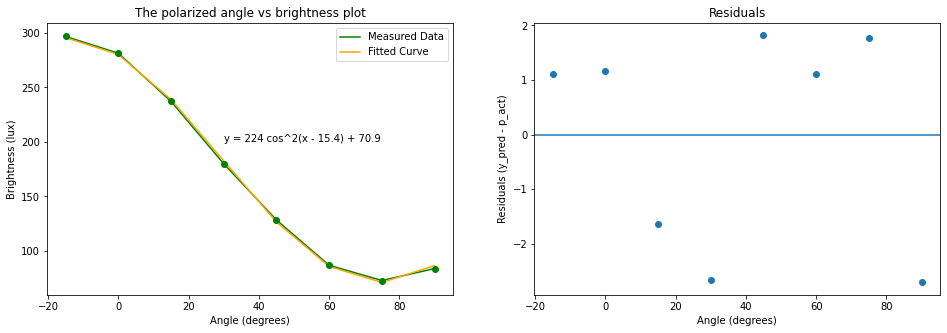

In [176]:
fig, ax = plt.subplots(1,2, figsize=(16,5))
ax[0].set_title("The polarized angle vs brightness plot")
ax[0].set_xlabel("Angle (degrees)")
ax[0].set_ylabel("Brightness (lux)")
ax[0].plot(angle, brightness, label="Measured Data", color='g')
ax[0].errorbar(angle, brightness, fmt="o", yerr=1, color='g')
ax[0].plot(angle, brightness2, label="Fitted Curve", color='orange')
ax[0].text(30, 200, f"y = {'%.3s'%b} cos^2(x - {'%.4s'%-d}) + {'%.4s'%c}")
ax[0].legend()

ax[1].set_title("Residuals")
ax[1].set_xlabel("Angle (degrees)")
ax[1].set_ylabel("Residuals (y_pred - p_act)")
ax[1].scatter(angle, np.subtract(brightness, brightness2), label="Residuals")
ax[1].axhline(0, label="Reference Line")

In [175]:
# Calculate Reduced Chi Squared Values
chi = sum([((brightness[i]-brightness2[i])/1)**2 for i in range(len(brightness))])
reduced_chi = chi/(25*8-3)
print(reduced_chi)

0.13865971896656185
